## usage data

In [1]:
from sqlalchemy import create_engine, types
from datetime import datetime, timedelta
from IPython.display import display
import matplotlib.pyplot as plt
import reliant_scrape as rs
import mysql.connector
import pandas as pd
import numpy as np
import pprint
import boto3
import boto
import json
import sys
import os

base = os.path.join('C:\\', 'Users', 'steve', 'Documents', 'reliant-scrape')
data = os.path.join(base, 'data')
pp = pprint.PrettyPrinter(indent = 1)
print('imported modules')

imported modules


## read data

In [2]:
print(os.listdir(data))

['daily_usage_08312020.csv', 'daily_usage_09052020.csv', 'daily_usage_09132020.csv', 'daily_usage_09212020.csv', 'daily_usage_09272020.csv', 'daily_usage_10032020.csv', 'daily_usage_10042020.csv', 'daily_usage_10082020.csv', 'master_energy_usage_091520.csv', 'master_energy_usage_092520.csv', 'master_energy_usage_100320.csv']


In [3]:
os.chdir(data)
use1 = pd.read_csv('daily_usage_08312020.csv', index_col = 0)
use2 = pd.read_csv('daily_usage_09052020.csv', index_col = 0)
use3 = pd.read_csv('daily_usage_09132020.csv', index_col = 0)
use4 = pd.read_csv('daily_usage_09212020.csv', index_col = 0)
use5 = pd.read_csv('daily_usage_09272020.csv', index_col = 0)
use6 = pd.read_csv('daily_usage_10042020.csv', index_col = 0)
use7 = pd.read_csv('daily_usage_10082020.csv', index_col = 0)

,Usage (kWh),Cost ($),Hi,Low
Date,,,,
2020-08-25 00:00:00,1.1,0.13,94,79
2020-08-25 01:00:00,1.2,0.14,94,79
2020-08-25 02:00:00,1.0,0.12,94,79
2020-08-25 03:00:00,1.0,0.12,94,79
2020-08-25 04:00:00,1.5,0.18,94,79


## create master df

In [10]:
master = pd.concat([use1, use2, use3, use4, use5, use6, use7], axis = 0)
master.head()

,Usage (kWh),Cost ($),Hi,Low
Date,,,,
2020-08-25 00:00:00,1.1,0.13,94,79
2020-08-25 01:00:00,1.2,0.14,94,79
2020-08-25 02:00:00,1.0,0.12,94,79
2020-08-25 03:00:00,1.0,0.12,94,79
2020-08-25 04:00:00,1.5,0.18,94,79


In [11]:
master.tail()

,Usage (kWh),Cost ($),Hi,Low
Date,,,,
2020-10-07 19:00:00,1.7,0.20,85,65
2020-10-07 20:00:00,1.8,0.21,85,65
2020-10-07 21:00:00,1.7,0.20,85,65
2020-10-07 22:00:00,1.9,0.23,85,65
2020-10-07 23:00:00,1.6,0.19,85,65


In [12]:
os.getcwd()

'C:\\Users\\steve\\Documents\\reliant-scrape\\data'

In [13]:
os.chdir(data)
master.to_csv('master_energy_usage_100820.csv')
print('wrote master file to .csv.')

wrote master file to .csv.


In [27]:
os.chdir(data)
master = pd.read_csv('master_energy_usage_100820.csv')
master['Date'] = pd.to_datetime(master['Date'])

## plots

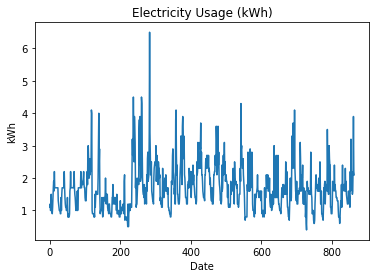

In [15]:
plt.title('Electricity Usage (kWh)')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.plot(master['Usage (kWh)'])
plt.show()

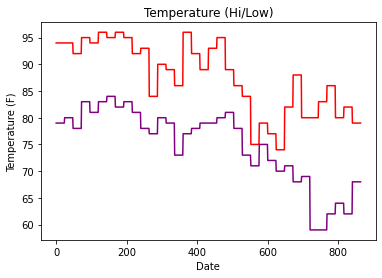

In [16]:
plt.title('Temperature (Hi/Low)')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.plot(master['Hi'], color = 'red')
plt.plot(master['Low'], color = 'purple')
plt.show()

In [17]:
round(np.sum(master['Cost ($)']), 2)

175.34

## stage data

In [29]:
master.tail()

,Date,Usage (kWh),Cost ($),Hi,Low
859,2020-10-05 19:00:00,1.6,0.19,79,68
860,2020-10-05 20:00:00,2.3,0.28,79,68
861,2020-10-05 21:00:00,3.9,0.47,79,68
862,2020-10-05 22:00:00,2.2,0.26,79,68
863,2020-10-05 23:00:00,2.1,0.25,79,68


In [28]:
stage = pd.read_csv('daily_usage_10082020.csv')
stage['Date'] = pd.to_datetime(stage['Date'])
stage.head()

,Date,Usage (kWh),Cost ($),Hi,Low
0,2020-10-05 00:00:00,1.9,0.23,79,68
1,2020-10-05 01:00:00,1.5,0.18,79,68
2,2020-10-05 02:00:00,1.4,0.16,79,68
3,2020-10-05 03:00:00,1.3,0.16,79,68
4,2020-10-05 04:00:00,1.2,0.15,79,68


In [30]:
master.dtypes

Date           datetime64[ns]
Usage (kWh)           float64
Cost ($)              float64
Hi                      int64
Low                     int64
dtype: object

In [34]:
last_day = np.max(master.Date)
recent = [d > last_day for d in stage.Date]
merge = stage.iloc[recent,:]

In [36]:
merge.head()

,Date,Usage (kWh),Cost ($),Hi,Low
24,2020-10-06 00:00:00,1.5,0.18,84,67
25,2020-10-06 01:00:00,1.3,0.15,84,67
26,2020-10-06 02:00:00,1.2,0.15,84,67
27,2020-10-06 03:00:00,1.2,0.15,84,67
28,2020-10-06 04:00:00,1.2,0.14,84,67


In [37]:
merge.tail()

,Date,Usage (kWh),Cost ($),Hi,Low
67,2020-10-07 19:00:00,1.7,0.20,85,65
68,2020-10-07 20:00:00,1.8,0.21,85,65
69,2020-10-07 21:00:00,1.7,0.20,85,65
70,2020-10-07 22:00:00,1.9,0.23,85,65
71,2020-10-07 23:00:00,1.6,0.19,85,65


In [50]:
len(merge.index)

48

## database authentication
From AWS docs: https://docs.aws.amazon.com/AmazonRDS/latest/UserGuide/UsingWithRDS.IAMDBAuth.Connecting.Python.html

In [39]:
os.chdir(base)

with open('db_creds.json', 'r') as f:
    db_creds = json.load(f)

In [40]:
os.environ['LIBMYSQL_ENABLE_CLEARTEXT_PLUGIN'] = '1'

#gets the credentials from .aws/credentials
session = boto3.Session(region_name = 'us-east-2')
client = boto3.client('rds', region_name = 'us-east-2')

In [41]:
client.list_tags_for_resource(ResourceName = db_creds['DBInstanceArn'])['TagList'][0]

{'Key': 'service', 'Value': 'reliant-energy'}

## database connection

In [42]:
data_table = rs.mysql_query('SELECT * FROM reliant_energy_db.daily_use', db_creds)

In [43]:
display(data_table)

,Date,Usage (kWh),Cost ($),Hi,Low
0,2020-08-25 00:00:00,1.1,0.13,94,79
1,2020-08-25 01:00:00,1.2,0.14,94,79
2,2020-08-25 02:00:00,1.0,0.12,94,79
3,2020-08-25 03:00:00,1.0,0.12,94,79
4,2020-08-25 04:00:00,1.5,0.18,94,79
...,...,...,...,...,...
907,2020-10-07 19:00:00,1.7,0.20,85,65
908,2020-10-07 20:00:00,1.8,0.21,85,65
909,2020-10-07 21:00:00,1.7,0.20,85,65
910,2020-10-07 22:00:00,1.9,0.23,85,65


In [44]:
data_table.dtypes

Date           datetime64[ns]
Usage (kWh)           float64
Cost ($)              float64
Hi                      int64
Low                     int64
dtype: object

In [20]:
#data_table.to_csv('data_table_test.csv', index = False)
#print('exported table to .csv')

exported table to .csv


## insert merge data

In [ ]:
rs.table_upload(merge, 'reliant_energy_db', 'daily_use', db_creds)

In [45]:
result = rs.mysql_query('SELECT MIN(Date) as min_date, MAX(Date) as max_date, COUNT(*) as count FROM reliant_energy_db.daily_use', db_creds)

In [46]:
result

,min_date,max_date,count
0,2020-08-25,2020-10-07 23:00:00,912


In [8]:
print('found data range of {} to {} with {} records.'.format(result.min_date[0], result.max_date[0], result['count'][0]))

found data range of 2020-08-25 00:00:00 to 2020-09-17 23:00:00 with 960 records.


## read master data

so date isn't an index.

In [29]:
os.chdir(data)
master = pd.read_csv('master_energy_usage_092520.csv')
master.Date = pd.to_datetime(master.Date)
#master = master['Date', 'Usage (kWh)', 'Cost ($)', 'Hi', 'Low']
print(master.shape)
master.head()

(552, 5)


,Date,Usage (kWh),Cost ($),Hi,Low
0,2020-08-25 00:00:00,1.1,0.13,94,79
1,2020-08-25 01:00:00,1.2,0.14,94,79
2,2020-08-25 02:00:00,1.0,0.12,94,79
3,2020-08-25 03:00:00,1.0,0.12,94,79
4,2020-08-25 04:00:00,1.5,0.18,94,79


In [28]:
master.dtypes

Date           datetime64[ns]
Usage (kWh)           float64
Cost ($)              float64
Hi                      int64
Low                     int64
dtype: object

## upload data
https://stackoverflow.com/questions/10154633/load-csv-data-into-mysql-in-python

In [30]:
rs.table_upload(master, 'reliant_energy_db', 'daily_use', db_creds)

wrote df to sql table.
